In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  # 不发出警告
from matplotlib import font_manager 
import seaborn as sns; sns.set_color_codes=True #用color_palette预定的颜色
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置汉字字体,优先使用黑体
plt.rcParams['font.size'] = 14  # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False   # 设置正常显示负号

In [2]:
# 加载数据（csv分隔符是分号）
bank = pd.read_csv('C:\\Users\\86188\\Desktop\\DS\\bank-additional-full.csv', sep=';')
bank.head()
# 将类别变量y转换为虚拟变量
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
print('y:\n', bank['y'].unique())

y:
 ['no' 'yes']


In [4]:
# 利用info函数查看数据的基本信息
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# 查看列名
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

1 银行客户数据分析与分类处理
从原数据集提取一个只包含与银行客户相关属性的数据集

In [6]:
# 提取与银行客户相关的属性
bank_client = bank.iloc[:, 0:7]
bank_client.head()

age        job  marital    education  default housing loan
0   56  housemaid  married     basic.4y       no      no   no
1   57   services  married  high.school  unknown      no   no
2   37   services  married  high.school       no     yes   no
3   40     admin.  married     basic.6y       no      no   no
4   56   services  married  high.school       no      no  yes

1.1 了解银行客户数据集的分类变量

In [7]:
# 了解client分类变量
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())

print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())


Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


1.2 Age年龄

In [8]:
# 找到age列的异常的数据和空集
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


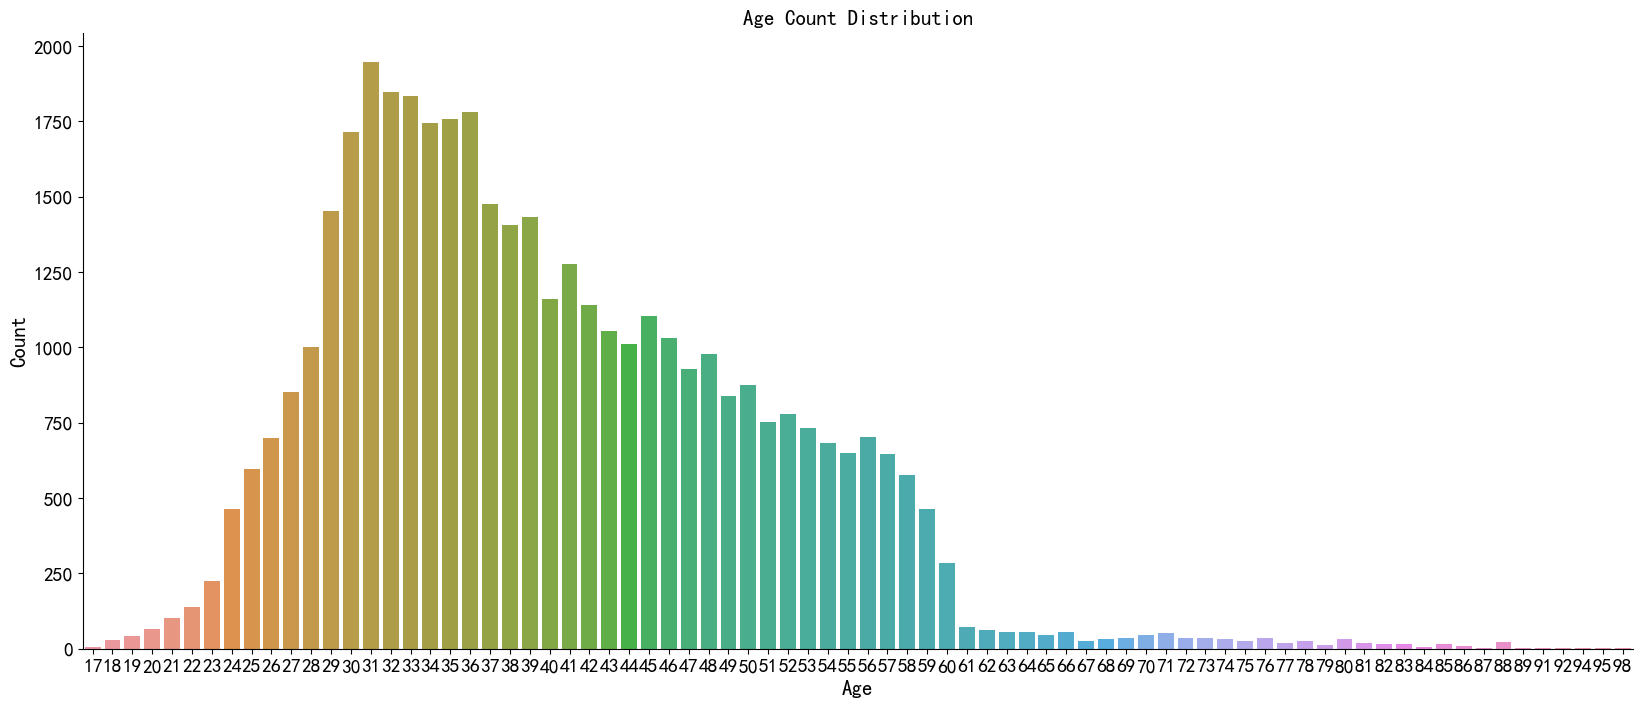

In [9]:
# 银行客户各个年龄age的分布状况
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

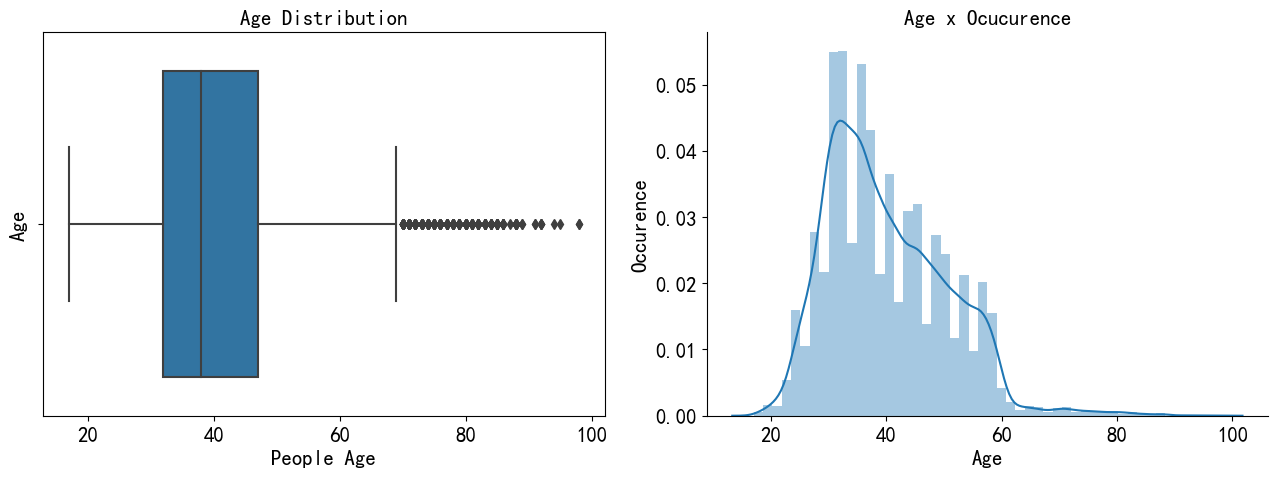

In [10]:
# 银行客户集中年龄的分布状况
# 创建两个子图像
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
# 第一个子图绘制箱线图展示年龄数据的分布情况
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
# 第二个子图绘制直方图展示年龄数据的分布情况
sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
# 图形调整
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [11]:
# 打印age列的第一四分位数（Q1）
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
# 打印age列的第二四分位数（Q2，即中位数）
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
# 打印age列的第三四分位数（Q3）
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
# 打印age列的第四四分位数（Q4，即最大值）
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))

# 计算异常值：
# 四分位距，IQR = Q3 - Q1
# 下1.5*IQR界限 = Q1 - 1.5 * IQR
# 上1.5*IQR界限 = Q3 + 1.5 * IQR

# 打印age列中异常值的上限
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [12]:
# 打印年龄大于 69.6 的异常值数量
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
# 打印总客户数量
print('Number of clients: ', len(bank_client))
# 打印异常值占总客户数量的百分比
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [13]:
# 打印年龄的均值，保留一位小数
print('MEAN:', round(bank_client['age'].mean(), 1))

# 打印年龄的标准差，保留一位小数
print('STD :', round(bank_client['age'].std(), 1))

# 计算年龄的变异系数，保留一位小数，并打印结果
# 变异系数是标准差与均值的比值，用于衡量数据的离散程度
# 这里打印了变异系数，并给出了数据离散程度的判断：高离散度
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')


MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


1.3 Jobs职业

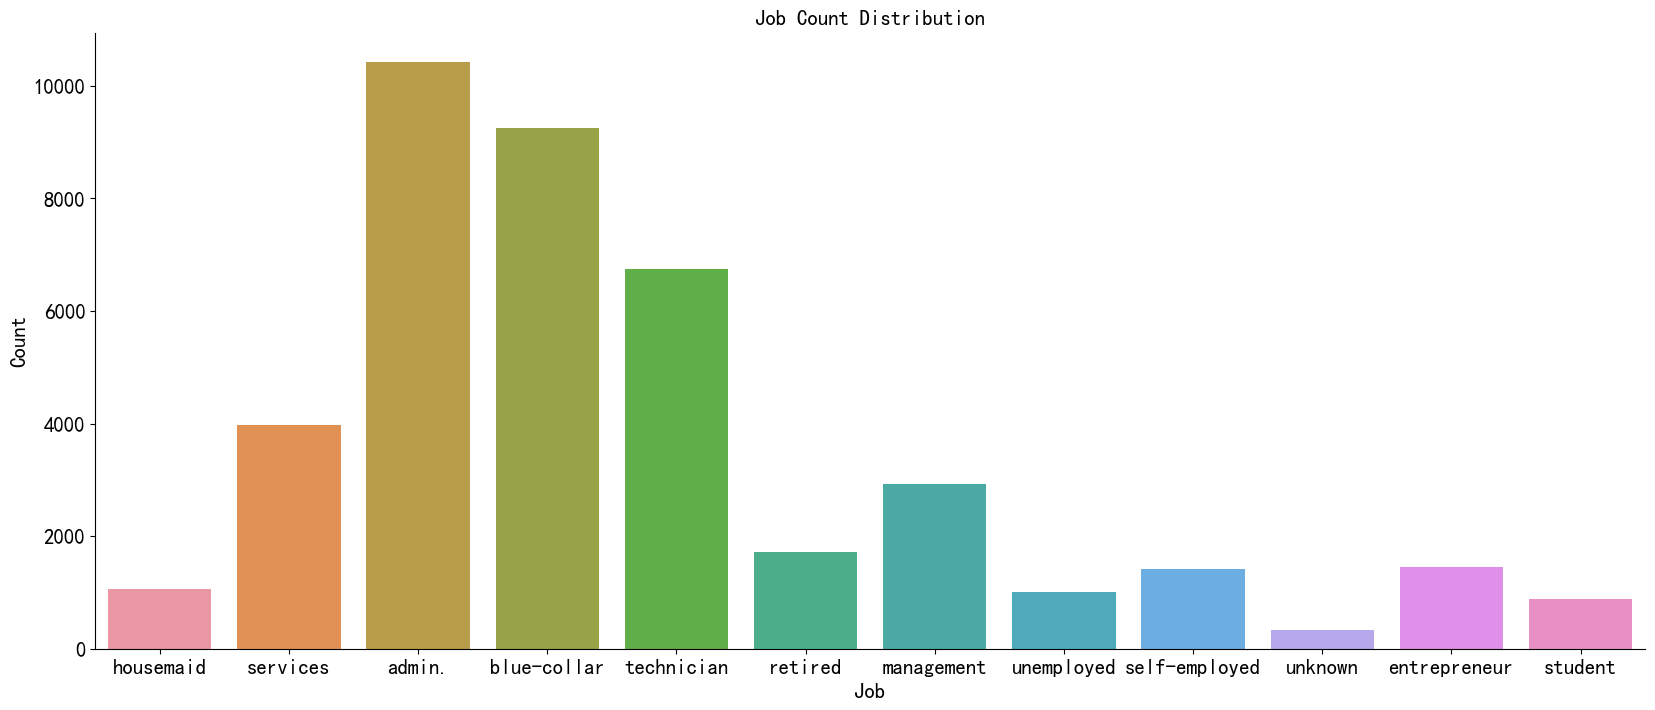

In [14]:
# 银行客户各个职业jobs的分布图
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

1.4 Marital婚姻状况

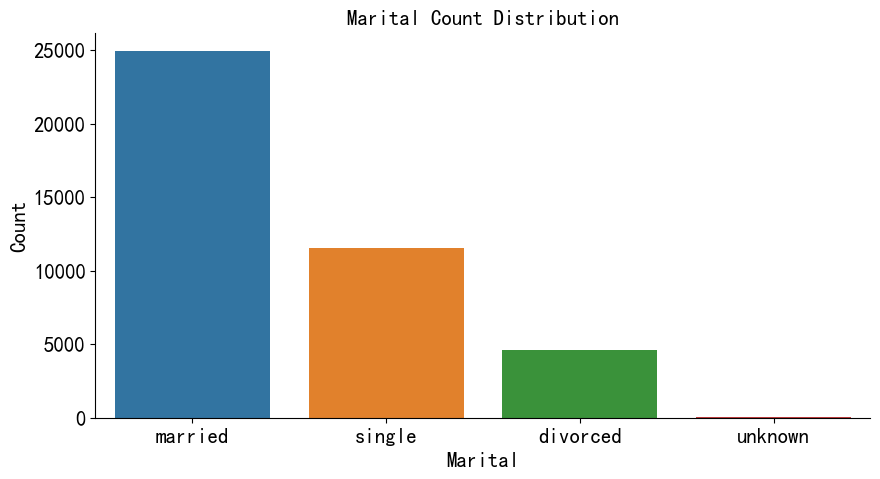

In [15]:
# 银行客户各个婚姻状况marital的分布图
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

1.5 Education教育

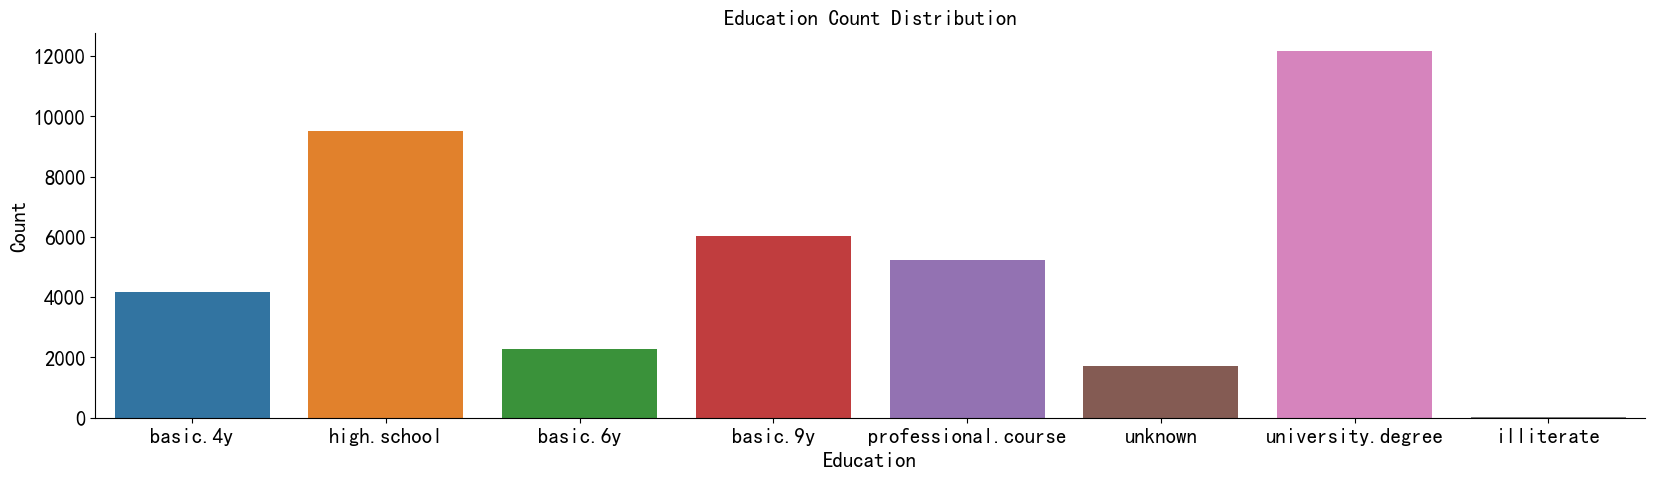

In [16]:
# 银行客户教育状况education的分布图
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

1.6 Default是否违约, Housing是否有住房贷款, Loan个人贷款

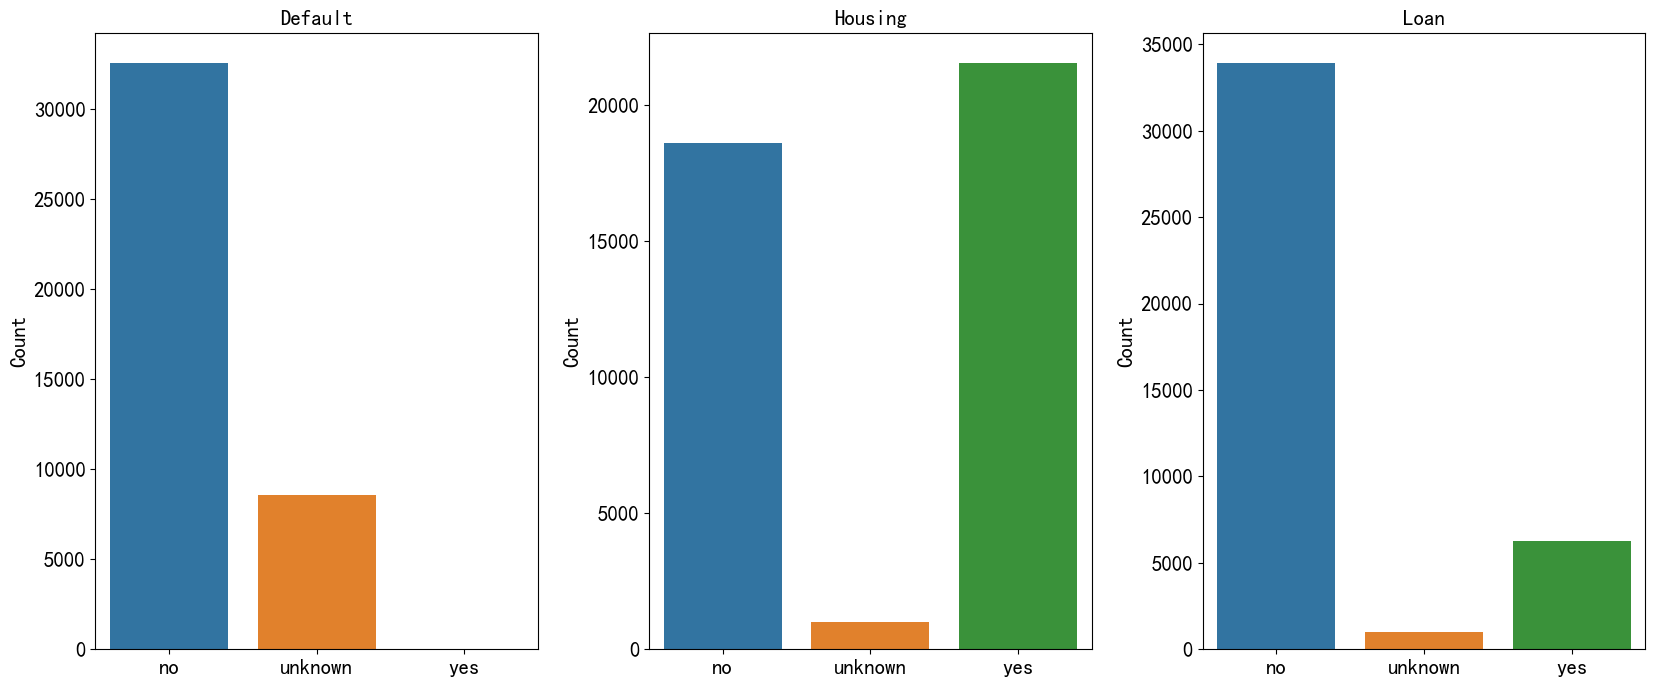

In [17]:
# 绘制银行客户信用是否违约的分布图
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
# 绘制银行客户是否有住房贷款的分布图
# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
#绘制银行客户是否有个人贷款的分布图
# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [18]:
# 统计银行客户数据集中不同信用状态（default）的客户数量，并按年龄进行分组。
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())
# 统计银行客户数据集中不同住房状态（housing）的客户数量，并按年龄进行分组。
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())
# 统计银行客户数据集中不同贷款状态（loan）的客户数量，并按年龄进行分组。
print('Loan:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3
Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576
Loan:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


1.7 银行客户分类处理
由于稍后将应用缩放功能，因此将工作、婚姻、教育、违约、住房、贷款转换为连续数据。

In [19]:
# 导入标签编码器
from sklearn.preprocessing import LabelEncoder

# 创建一个标签编码器对象
labelencoder_X = LabelEncoder()

# 对 'job' 列进行标签编码
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])

# 对 'marital' 列进行标签编码
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])

# 对 'education' 列进行标签编码
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])

# 对 'default' 列进行标签编码
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])

# 对 'housing' 列进行标签编码
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])

# 对 'loan' 列进行标签编码
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])


In [20]:
# 将银行客户数据集中的年龄age进行分组，分为4个年龄段，分别为青年，中年，老年，超老年，分别用1，2，3，4表示，然后将数据集中的age列替换为新的分组数据
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [21]:
bank_client.head()

age  job  marital  education  default  housing  loan
0    3    3        1          0        0        0     0
1    3    7        1          3        1        0     0
2    2    7        1          3        0        2     0
3    2    0        1          1        0        0     0
4    3    7        1          3        0        0     2

In [22]:
# 打印数据集的形状
print(bank_client.shape)
# 展示数据集的前 5 行数据
bank_client.head()


(41188, 7)


age  job  marital  education  default  housing  loan
0    3    3        1          0        0        0     0
1    3    7        1          3        1        0     0
2    2    7        1          3        0        2     0
3    2    0        1          1        0        0     0
4    3    7        1          3        0        0     2

2 处理与当前活动的最后一次联络有关的分类变量

In [23]:
# 从 bank 数据集中提取出与最后一次联络相关的列，这些列的索引为 7 到 10
bank_related = bank.iloc[:, 7:11]
# 展示 bank_related 数据集的前 5 行数据
bank_related.head()

contact month day_of_week  duration
0  telephone   may         mon       261
1  telephone   may         mon       149
2  telephone   may         mon       226
3  telephone   may         mon       151
4  telephone   may         mon       307

In [24]:
# 检查 bank_related 数据集中是否存在缺失值
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [25]:
# 打印 'contact' 列的唯一值
print("Kind of Contact: \n", bank_related['contact'].unique())
# 打印 'month' 列的唯一值
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
# 打印 'day_of_week' 列的唯一值
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())


Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


2.1 客户通话时长Duration
有 1544 个不同的值

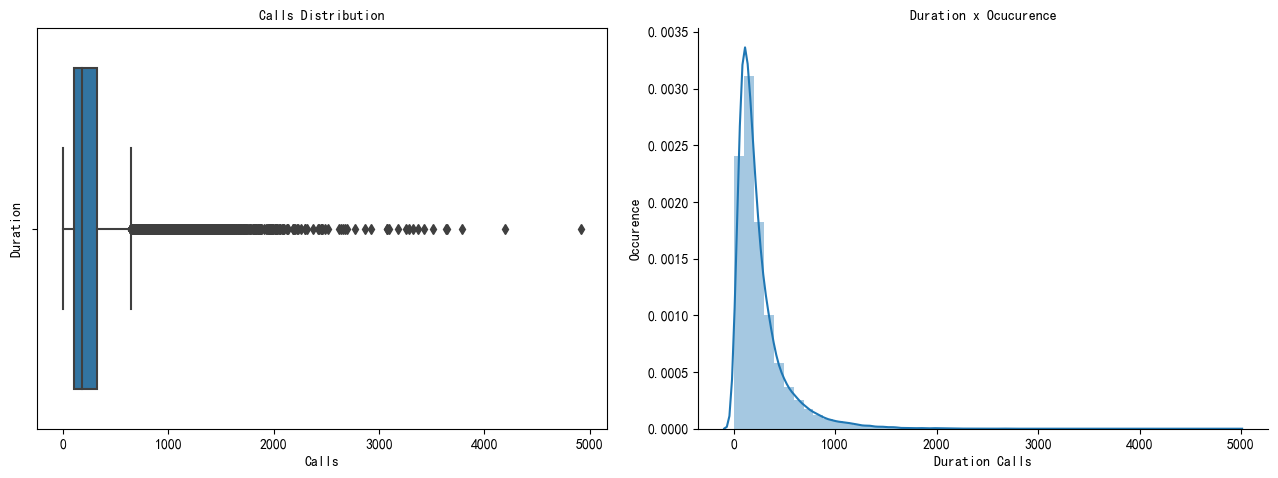

In [26]:
# 使用 plt.subplots 创建一个 1 行 2 列的子图布局，figsize 为 (13, 5)
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
# 使用 sns.boxplot 绘制 duration 列的箱线图，orient 为 'v'，即垂直方向，ax 指定为 ax1
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
# 设置 ax1 的 x 轴标签为 'Calls'，字体大小为 10
ax1.set_xlabel('Calls', fontsize=10)
# 设置 ax1 的 y 轴标签为 'Duration'，字体大小为 10
ax1.set_ylabel('Duration', fontsize=10)
# 设置 ax1 的标题为 'Calls Distribution'，字体大小为 10
ax1.set_title('Calls Distribution', fontsize=10)
# 设置 ax1 的刻度标签字体大小为 10
ax1.tick_params(labelsize=10)
# 使用 sns.distplot 绘制 duration 列的直方图，ax 指定为 ax2
sns.distplot(bank_related['duration'], ax = ax2)
# 使用 sns.despine 去除 ax2 的顶部和右侧边框
sns.despine(ax = ax2)
# 设置 ax2 的 x 轴标签为 'Duration Calls'，字体大小为 10
ax2.set_xlabel('Duration Calls', fontsize=10)
# 设置 ax2 的 y 轴标签为 'Occurence'，字体大小为 10
ax2.set_ylabel('Occurence', fontsize=10)
# 设置 ax2 的标题为 'Duration x Ocucurence'，字体大小为 10
ax2.set_title('Duration x Ocucurence', fontsize=10)
# 设置 ax2 的刻度标签字体大小为 10
ax2.tick_params(labelsize=10)
# 使用 plt.subplots_adjust 调整子图之间的间距，wspace 为 0.5
plt.subplots_adjust(wspace=0.5)
# 使用 plt.tight_layout 确保布局紧凑，避免图形元素重叠
plt.tight_layout()


In [27]:
# 打印出 duration 列的最大值（以分钟为单位），并四舍五入到小数点后一位
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
# 打印出 duration 列的最小值（以分钟为单位），并四舍五入到小数点后一位
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
# 打印出 duration 列的平均值（以分钟为单位），并四舍五入到小数点后一位
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
# 打印出 duration 列的标准差（以分钟为单位），并四舍五入到小数点后一位
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))


Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [28]:
# 打印出 duration 列的第一四分位数（25%分位数）
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
# 打印出 duration 列的第二四分位数（50%分位数，即中位数）
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
# 打印出 duration 列的第三四分位数（75%分位数）
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
# 打印出 duration 列的第四四分位数（100%分位数，即最大值）
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))

# 计算 duration 列的异常值阈值，使用四分位间距（IQR）方法
# 异常值定义为大于第三四分位数加上1.5倍IQR的值
outlier_threshold = bank_related['duration'].quantile(q = 0.75) + 1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25))

# 打印出异常值阈值，并指出超过该阈值的 duration 通话被视为异常值
print('Duration calls above: ', outlier_threshold, 'are outliers')


1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [29]:
# 打印出 duration 列中大于异常值阈值（644.5）的异常值数量
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
# 打印出总客户数量
print('Number of clients: ', len(bank_related))
# 计算并打印出异常值占总客户数量的百分比，保留两位小数
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')


Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [30]:
# 如果通话时间等于 0，那么显然这个人没有订阅，所以我们可以将这些数据删除
bank[(bank['duration'] == 0)]

age          job   marital          education default housing loan  \
6251    39       admin.   married        high.school      no     yes   no   
23031   59   management   married  university.degree      no     yes   no   
28063   53  blue-collar  divorced        high.school      no     yes   no   
33015   31  blue-collar   married           basic.9y      no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
6251   telephone   may         tue  ...         4    999         0   
23031   cellular   aug         tue  ...        10    999         0   
28063   cellular   apr         fri  ...         3    999         0   
33015   cellular   may         mon  ...         2    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
6251   nonexistent          1.1          93.994          -36.4      4.857   
23031  nonexistent          1.4          93.444          -36.1      4.965   
28063  nonexistent         -1.8          93.075          -47.1      1.479   
33015  nonexistent         -1.8          92.893          -46.2      1.299   

       nr.employed   y  
6251        5191.0  no  
23031       5228.1  no  
28063       5099.1  no  
33015       5099.1  no  

[4 rows x 21 columns]

2.2 Contact与银行客户的联系方式, Month当年与银行客户签订合同的最后一个月, Day of Week与银行客户签订合同的一周的最后一天

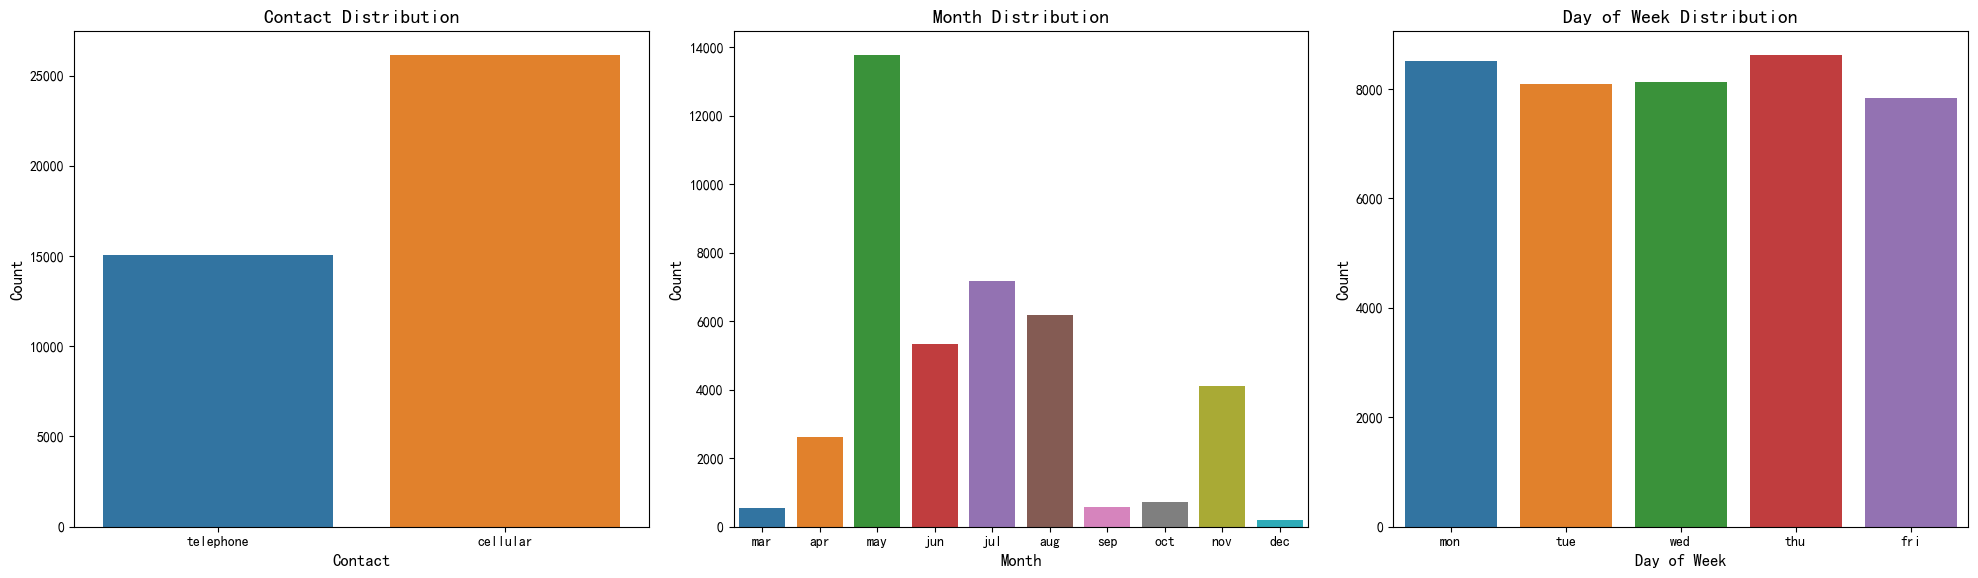

In [31]:
# 使用 plt.subplots 创建一个 1 行 3 列的子图布局，figsize 为 (20, 6)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# 绘制 contact 列的分布图
sns.countplot(x='contact', data=bank_related, ax=ax1)
ax1.set_xlabel('Contact', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Contact Distribution', fontsize=14)
ax1.tick_params(labelsize=10)

# 绘制 month 列的分布图
sns.countplot(x='month', data=bank_related, ax=ax2, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Month Distribution', fontsize=14)
ax2.tick_params(labelsize=10)

# 绘制 day_of_week 列的分布图
sns.countplot(x='day_of_week', data=bank_related, ax=ax3)
ax3.set_xlabel('Day of Week', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.set_title('Day of Week Distribution', fontsize=14)
ax3.tick_params(labelsize=10)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

2.3 对Contact, Month, Day of Week进行处理
编码将字符串转为数值

In [32]:
# 导入 LabelEncoder 类
from sklearn.preprocessing import LabelEncoder
# 创建一个 LabelEncoder 对象
labelencoder_X = LabelEncoder()
# 对 'contact' 列进行编码，将字符串值转换为数值
bank_related['contact'] = labelencoder_X.fit_transform(bank_related['contact'])
# 对'month' 列进行编码，将字符串值转换为数值
bank_related['month'] = labelencoder_X.fit_transform(bank_related['month'])
# 对 'day_of_week' 列进行编码，将字符串值转换为数值
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])


In [33]:
bank_related.head()

contact  month  day_of_week  duration
0        1      6            1       261
1        1      6            1       149
2        1      6            1       226
3        1      6            1       151
4        1      6            1       307

In [34]:
def duration(data):
    """
    将数据集中的 'duration' 列进行离散化处理。

    参数:
    data (DataFrame): 包含 'duration' 列的数据集。

    返回:
    DataFrame: 处理后的数据。
    """
    # 将 'duration' 小于等于 102 的值标记为 1
    data.loc[data['duration'] <= 102, 'duration'] = 1
    # 将 'duration' 大于 102 且小于等于 180 的值标记为 2
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180), 'duration'] = 2
    # 将 'duration' 大于 180 且小于等于 319 的值标记为 3
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319), 'duration'] = 3
    # 将 'duration' 大于 319 且小于等于 644.5 的值标记为 4
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    # 将 'duration' 大于 644.5 的值标记为 5
    data.loc[data['duration'] > 644.5, 'duration'] = 5

    return data

# 调用 duration 函数对 bank_related 数据集进行处理
duration(bank_related);


In [35]:
bank_related.head()

contact  month  day_of_week  duration
0        1      6            1         3
1        1      6            1         2
2        1      6            1         3
3        1      6            1         2
4        1      6            1         3

3 社会和经济背景属性
emp.var.rate就业变动率，cons.price居民消费价格指数，cons.conf.idx消费信心指数,euribor3m欧元兑美元三个月汇率，nr.employed从业人数


In [36]:
# 从原数据集提取和社会经济背景属性的列
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0

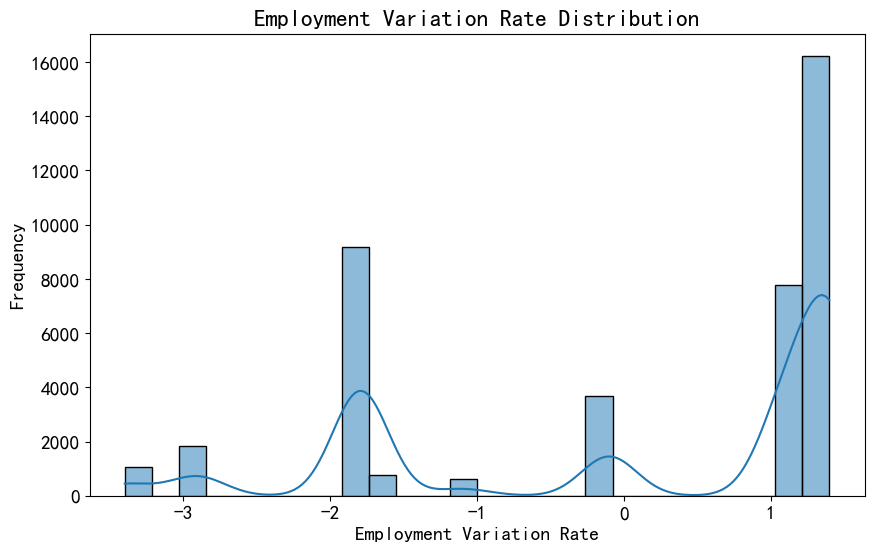

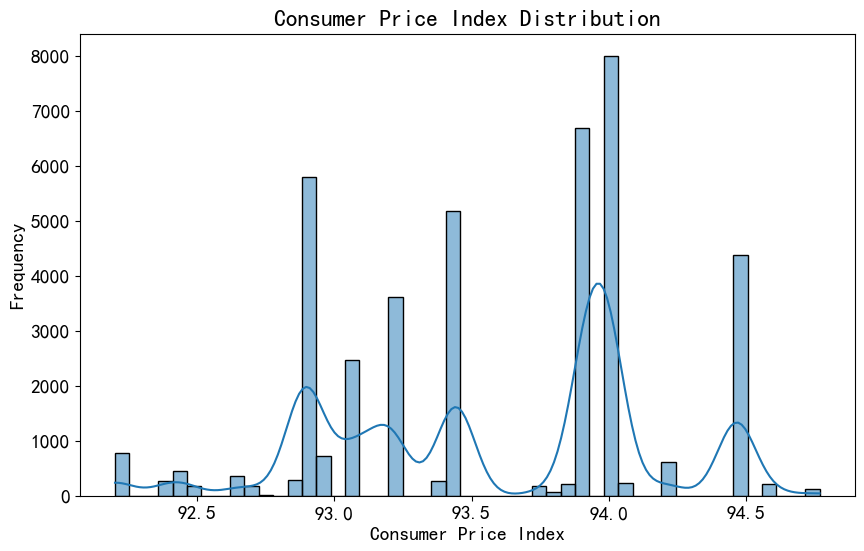

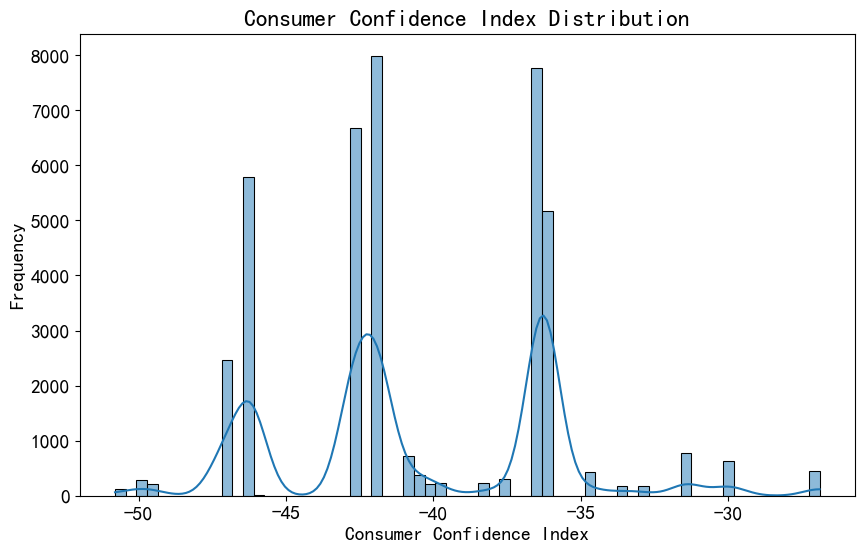

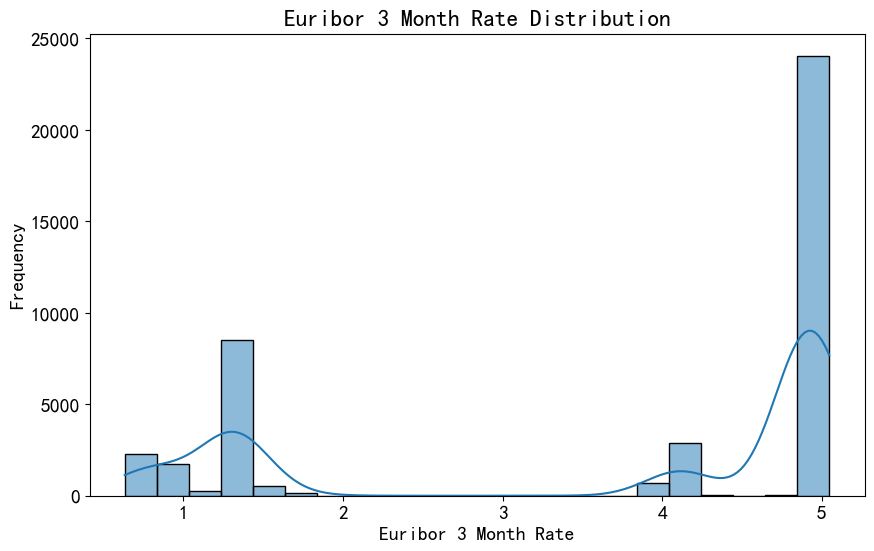

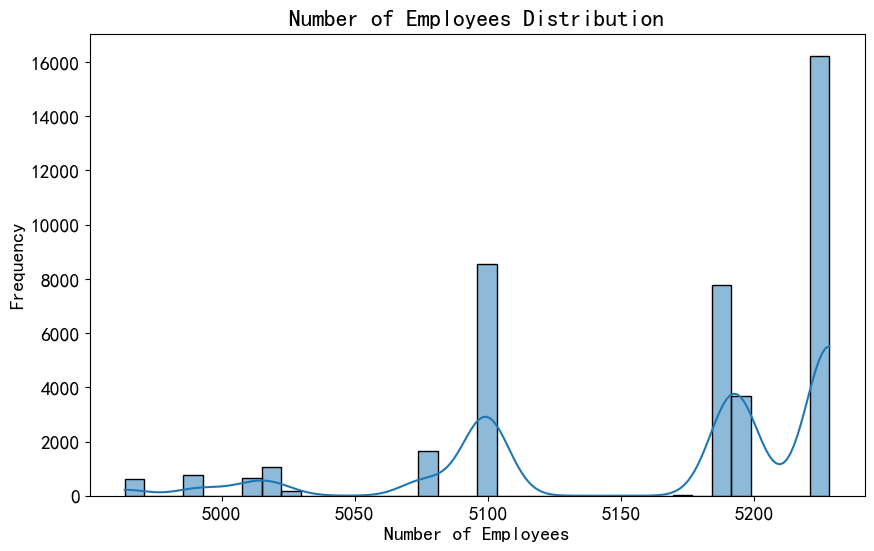

In [56]:
# 绘制emp.var.rate的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(bank_se['emp.var.rate'], kde=True)
plt.title('Employment Variation Rate Distribution')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Frequency')
plt.show()

# 绘制cons.price.idx的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(bank_se['cons.price.idx'], kde=True)
plt.title('Consumer Price Index Distribution')
plt.xlabel('Consumer Price Index')
plt.ylabel('Frequency')
plt.show()

# 绘制cons.conf.idx的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(bank_se['cons.conf.idx'], kde=True)
plt.title('Consumer Confidence Index Distribution')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')
plt.show()

# 绘制euribor3m的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(bank_se['euribor3m'], kde=True)
plt.title('Euribor 3 Month Rate Distribution')
plt.xlabel('Euribor 3 Month Rate')
plt.ylabel('Frequency')
plt.show()

# 绘制nr.employed的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(bank_se['nr.employed'], kde=True)
plt.title('Number of Employees Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

4 其他属性
campaign在这项营销活动期间和为这个客户进行的联系数量;pdays客户最后一次来访后的天数；previous在这项活动之前和为这个客户进行的联系数量;poutcome上次营销活动的结果

In [60]:
# 提取其他属性的列
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent

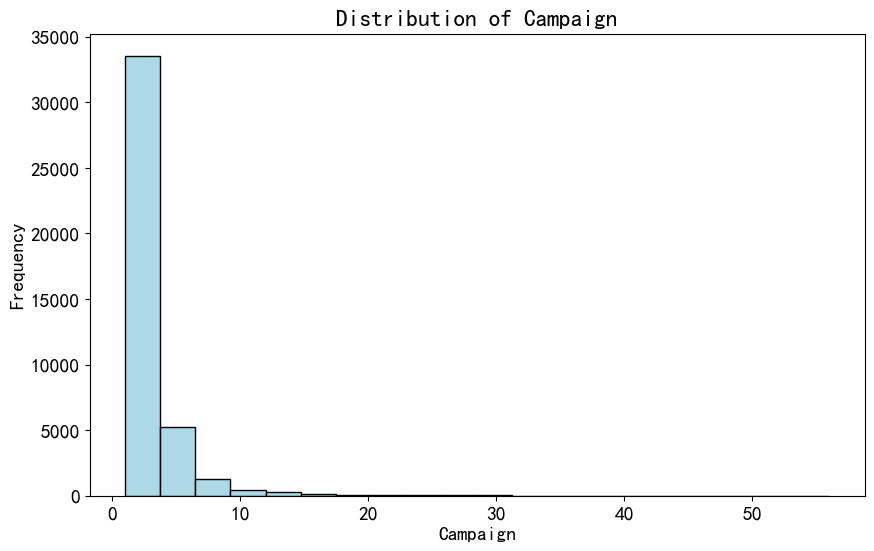

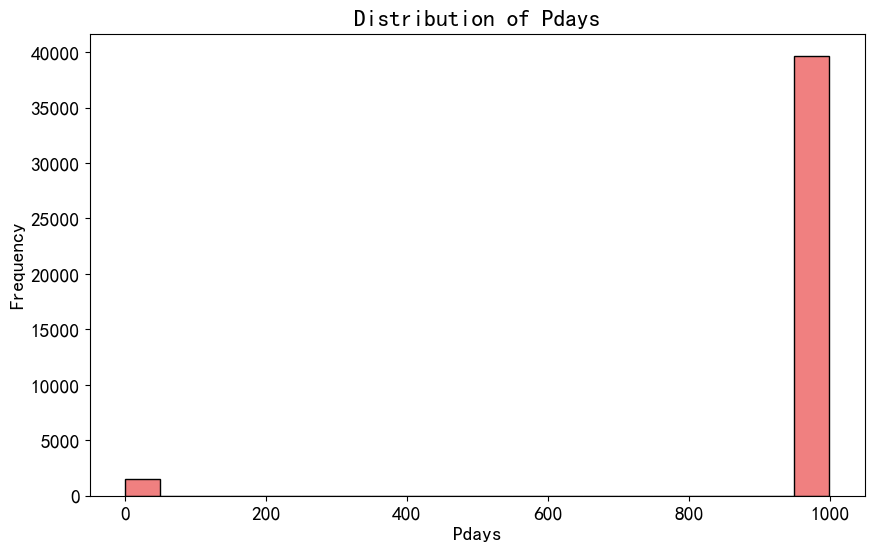

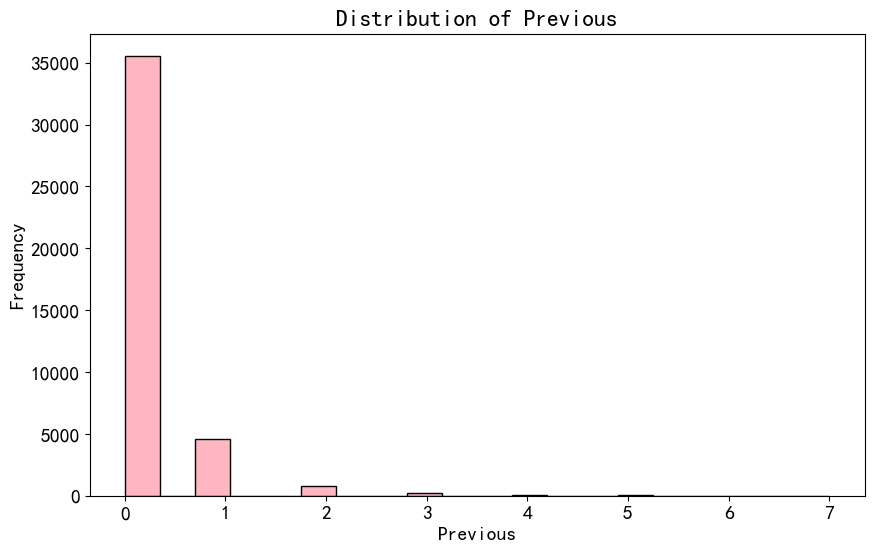

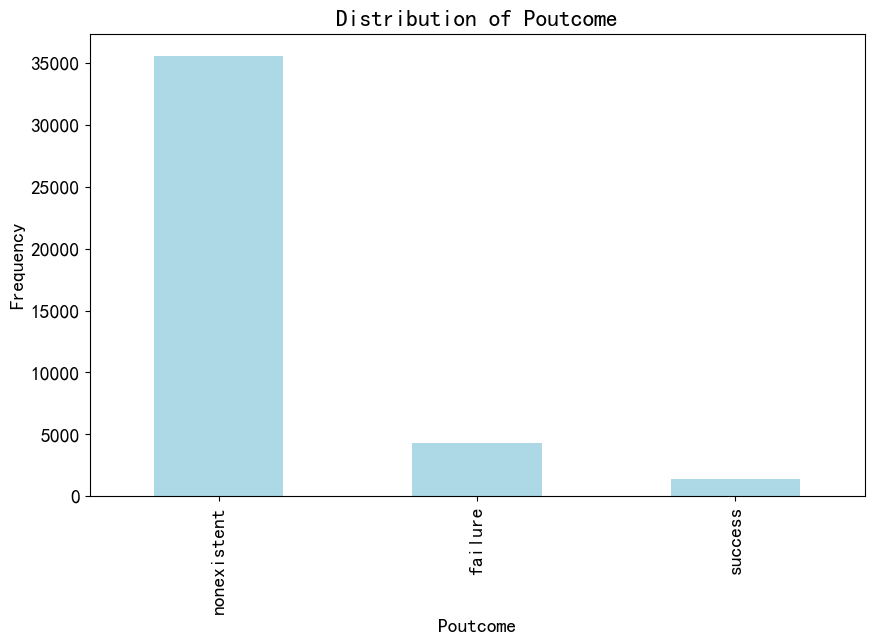

In [65]:
# 绘制 'campaign' 列的分布图
plt.figure(figsize=(10, 6))
bank_o['campaign'].plot(kind='hist', bins=20, edgecolor='black', color='lightblue')
plt.title('Distribution of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

# 绘制 'pdays' 列的分布图
plt.figure(figsize=(10, 6))
bank_o['pdays'].plot(kind='hist', bins=20, edgecolor='black', color='lightcoral')
plt.title('Distribution of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

# 绘制 'previous' 列的分布图
plt.figure(figsize=(10, 6))
bank_o['previous'].plot(kind='hist', bins=20, edgecolor='black', color='lightpink')
plt.title('Distribution of Previous')
plt.xlabel('Previous')
plt.ylabel('Frequency')
plt.show()

# 绘制 'poutcome' 列的分布图
plt.figure(figsize=(10, 6))
bank_o['poutcome'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Based on the provided data, it appears that you have several datasets and performance metrics related to a bank client classification problem. Here is a summary of the key components:

### Datasets:
1. **bank_client**: Contains demographic and financial information about the clients.
    - Columns: `age`, `job`, `marital`, `education`, `default`, `housing`, `loan`
    - Rows: 41188

2. **bank_final**: Contains additional features related to the clients' interactions and economic indicators.
    - Columns: `age`, `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `duration`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`, `campaign`, `pdays`, `previous`, `poutcome`
    - Rows: 41188

3. **bank_o**: Contains information about the clients' previous marketing campaign outcomes.
    - Columns: `campaign`, `pdays`, `previous`, `poutcome`
    - Rows: 41188

4. **bank_related**: Contains information about the clients' contact details and the duration of the last contact.
    - Columns: `contact`, `month`, `day_of_week`, `duration`
    - Rows: 41188

5. **bank_se**: Contains socio-economic indicators.
    - Columns: `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`
    - Rows: 41188

6. **y**: Contains the target variable indicating whether the client subscribed to a term deposit.
    - Column: `['y']_yes`
    - Rows: 41188

### Performance Metrics:
1. **Cross-Validation Mean and Standard Deviation**:
    - Accuracy, F1 Score, Precision, Recall for different models (Decision Tree, SVC, Random Forest, GaussianNB, KNN).

2. **ROC AUC Scores**:
    - For different models (Decision Tree, SVC, Random Forest, GaussianNB, KNN).

3. **Lift Scores**:
    - For different models (Decision Tree, SVC, Random Forest, GaussianNB, KNN).

### Models:
1. **Decision Tree**:
    - Classifier: `DecisionTreeClassifier()`
    - Performance: Mean Accuracy: 0.8849883987359297, Mean F1: 0.4943613804577671

2. **SVC**:
    - Classifier: `SVC(kernel='sigmoid')`
    - Performance: Mean Accuracy: 0.8557309781465152, Mean F1: 0.34975960299628933

3. **Random Forest**:
    - Classifier: `RandomForestClassifier(n_estimators=200)`
    - Performance: Mean Accuracy: 0.9096661629639058, Mean F1: 0.5508306152106036

4. **GaussianNB**:
    - Classifier: `GaussianNB()`
    - Performance: Mean Accuracy: 0.844642874409683, Mean F1: 0.4496664327616623

5. **KNN**:
    - Classifier: `KNeighborsClassifier(n_neighbors=22)`
    - Performance: Mean Accuracy: 0.9045438522606677, Mean F1: 0.3916113443427153

### Visualizations:
1. **ROC Curves**:
    - False Positive Rate (FPR) and True Positive Rate (TPR) for different models.

2. **Precision-Recall Curves**:
    - Precision and Recall values for different models.

### Summary:
- The Random Forest model has the highest mean accuracy (90.97%) and F1 score (55.08%) among the models evaluated.
- The Decision Tree model also performs well with a mean accuracy of 88.50% and an F1 score of 49.44%.
- The SVC model has the lowest mean F1 score (34.98%) but a decent accuracy (85.57%).
- The GaussianNB model has a good recall (56.74%) but lower precision (37.25%).
- The KNN model has a high precision (68.12%) but lower recall (27.54%).

This summary provides an overview of the datasets, models, and their performance metrics. If you need further analysis or specific visualizations, please let me know!

In [38]:
# 获取 'poutcome' 列的唯一值
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [39]:
# 替换 'poutcome' 列中的值
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

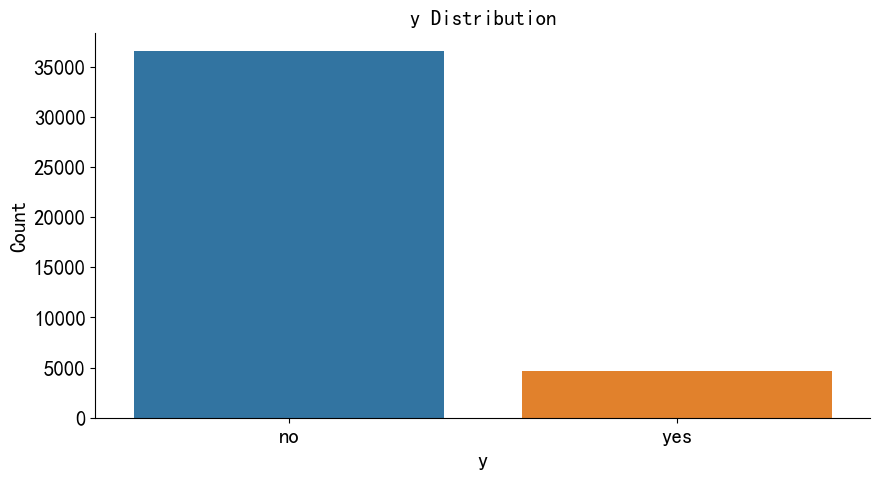

In [40]:
# 绘制y列的分布情况图
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x='y', data=bank)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('y Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.show()

5 模型建立

In [41]:
# 最终的用于模型建立的数据集
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [42]:
# 导入 train_test_split 函数，用于将数据集划分为训练集和测试集
from sklearn.model_selection import train_test_split
# 使用 train_test_split 函数将 bank_final 数据集划分为训练集和测试集，其中测试集占比为 0.1942313295，random_state 用于设置随机种子，保证每次划分结果一致
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)
# 导入 KFold 类，用于进行 K 折交叉验证
from sklearn.model_selection import KFold
# 导入 cross_val_score 函数，用于进行交叉验证并计算模型得分
from sklearn.model_selection import cross_val_score

# 导入 confusion_matrix 函数，用于计算混淆矩阵
from sklearn.metrics import confusion_matrix

# 导入 accuracy_score 函数，用于计算模型的准确率
from sklearn.metrics import accuracy_score

# 创建一个 KFold 对象，n_splits=5 表示将数据集划分为 5 份，shuffle=True 表示在划分前打乱数据集，random_state=0 用于设置随机种子
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)


In [43]:
X_train.head()

age  job  marital  education  default  housing  loan  contact  month  \
38912    3    5        1          6        0        2     0        0      7   
9455     2    7        1          5        1        0     0        1      4   
14153    1    4        1          6        0        2     0        0      3   
25021    3    6        1          6        0        2     0        0      7   
30911    2    5        0          0        0        2     2        0      6   

       day_of_week  duration  emp.var.rate  cons.price.idx  cons.conf.idx  \
38912            4         5          -3.4          92.649          -30.1   
9455             0         2           1.4          94.465          -41.8   
14153            1         5           1.4          93.918          -42.7   
25021            3         1          -0.1          93.200          -42.0   
30911            3         3          -1.8          92.893          -46.2   

       euribor3m  nr.employed  campaign  pdays  previous  poutcome  
38912      0.716       5017.5         2      3         3         3  
9455       4.967       5228.1         1    999         0         1  
14153      4.962       5228.1         3    999         0         1  
25021      4.153       5195.8         1    999         0         1  
30911      1.344       5099.1         2    999         1         2

In [44]:
# 导入 StandardScaler 类，用于数据标准化
from sklearn.preprocessing import StandardScaler
# 创建一个 StandardScaler 对象
sc_X = StandardScaler()
# 对训练集进行标准化处理，并将结果保存到 X_train 中
X_train = sc_X.fit_transform(X_train)
# 对测试集进行标准化处理，并将结果保存到 X_test 中
X_test = sc_X.transform(X_test)

5.1 决策树

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# 初始化列表，用于存储每次实验的性能指标
dt_accuracies = []
dt_f1_scores = []
dt_recall_scores = []
dt_precision_scores = []

# 运行三次实验
for i in range(3):
    dtree = DecisionTreeClassifier(criterion='gini')
    dtree.fit(X_train, y_train)
    dtreepred = dtree.predict(X_test)
    
    dt_accuracies.append(accuracy_score(y_test, dtreepred))
    dt_f1_scores.append(f1_score(y_test, dtreepred))
    dt_recall_scores.append(recall_score(y_test, dtreepred))
    dt_precision_scores.append(precision_score(y_test, dtreepred))

# 打印混淆矩阵，以评估模型的预测效果
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dtreepred))

# 使用交叉验证评估决策树模型的性能
dt_cv_accuracies = cross_val_score(dtree, X_train, y_train, cv=k_fold, scoring='accuracy')
dt_cv_f1_scores = cross_val_score(dtree, X_train, y_train, cv=k_fold, scoring='f1')
dt_cv_recall_scores = cross_val_score(dtree, X_train, y_train, cv=k_fold, scoring='recall')
dt_cv_precision_scores = cross_val_score(dtree, X_train, y_train, cv=k_fold, scoring='precision')

# 计算交叉验证输出的性能指标的平均值和标准差
cv_mean_accuracy = dt_cv_accuracies.mean()
cv_std_accuracy = dt_cv_accuracies.std()
cv_mean_f1 = dt_cv_f1_scores.mean()
cv_std_f1 = dt_cv_f1_scores.std()
cv_mean_recall = dt_cv_recall_scores.mean()
cv_std_recall = dt_cv_recall_scores.std()
cv_mean_precision = dt_cv_precision_scores.mean()
cv_std_precision = dt_cv_precision_scores.std()

# 打印交叉验证输出的性能指标的平均值和标准差
print("Decision Tree CV - Mean Accuracy: {:.2f}%".format(cv_mean_accuracy * 100))
print("Decision Tree CV - Std Accuracy: {:.2f}%".format(cv_std_accuracy * 100))
print("Decision Tree CV - Mean F1: {:.2f}%".format(cv_mean_f1 * 100))
print("Decision Tree CV - Std F1: {:.2f}%".format(cv_std_f1 * 100))
print("Decision Tree CV - Mean Recall: {:.2f}%".format(cv_mean_recall * 100))
print("Decision Tree CV - Std Recall: {:.2f}%".format(cv_std_recall * 100))
print("Decision Tree CV - Mean Precision: {:.2f}%".format(cv_mean_precision * 100))
print("Decision Tree CV - Std Precision: {:.2f}%".format(cv_std_precision * 100))


Decision Tree Confusion Matrix:
 [[6617  456]
 [ 488  439]]
Decision Tree CV - Mean Accuracy: 88.50%
Decision Tree CV - Std Accuracy: 0.22%
Decision Tree CV - Mean F1: 49.44%
Decision Tree CV - Std F1: 2.16%
Decision Tree CV - Mean Recall: 49.80%
Decision Tree CV - Std Recall: 2.27%
Decision Tree CV - Mean Precision: 48.30%
Decision Tree CV - Std Precision: 2.04%


5.2 支持向量机

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
svc= SVC(kernel = 'sigmoid')
# 初始化列表，用于存储每次实验的性能指标
svc_accuracies = []
svc_f1_scores = []
svc_recall_scores = []
svc_precision_scores = []

# 运行三次实验
for i in range(3):
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    
    svc_accuracies.append(accuracy_score(y_test, svcpred))
    svc_f1_scores.append(f1_score(y_test, svcpred))
    svc_recall_scores.append(recall_score(y_test, svcpred))
    svc_precision_scores.append(precision_score(y_test, svcpred))

# 打印混淆矩阵，以评估模型的预测效果
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, svcpred))

# 使用交叉验证评估SVC模型的性能
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
svc_cv_accuracies = cross_val_score(svc, X_train, y_train, cv=k_fold, scoring='accuracy')
svc_cv_f1_scores = cross_val_score(svc, X_train, y_train, cv=k_fold, scoring='f1')
svc_cv_recall_scores = cross_val_score(svc, X_train, y_train, cv=k_fold, scoring='recall')
svc_cv_precision_scores = cross_val_score(svc, X_train, y_train, cv=k_fold, scoring='precision')

# 计算交叉验证输出的性能指标的平均值和标准差
svc_cv_mean_accuracy = svc_cv_accuracies.mean()
svc_cv_std_accuracy = svc_cv_accuracies.std()
svc_cv_mean_f1 = svc_cv_f1_scores.mean()
svc_cv_std_f1 = svc_cv_f1_scores.std()
svc_cv_mean_recall = svc_cv_recall_scores.mean()
svc_cv_std_recall = svc_cv_recall_scores.std()
svc_cv_mean_precision = svc_cv_precision_scores.mean()
svc_cv_std_precision = svc_cv_precision_scores.std()

# 打印交叉验证输出的性能指标的平均值和标准差
print("SVC CV - Mean Accuracy: {:.2f}%".format(svc_cv_mean_accuracy * 100))
print("SVC CV - Std Accuracy: {:.2f}%".format(svc_cv_std_accuracy * 100))
print("SVC CV - Mean F1: {:.2f}%".format(svc_cv_mean_f1 * 100))
print("SVC CV - Std F1: {:.2f}%".format(svc_cv_std_f1 * 100))
print("SVC CV - Mean Recall: {:.2f}%".format(svc_cv_mean_recall * 100))
print("SVC CV - Std Recall: {:.2f}%".format(svc_cv_std_recall * 100))
print("SVC CV - Mean Precision: {:.2f}%".format(svc_cv_mean_precision * 100))
print("SVC CV - Std Precision: {:.2f}%".format(svc_cv_std_precision * 100))

SVC Confusion Matrix:
 [[6531  542]
 [ 584  343]]
SVC CV - Mean Accuracy: 85.57%
SVC CV - Std Accuracy: 0.15%
SVC CV - Mean F1: 34.98%
SVC CV - Std F1: 1.13%
SVC CV - Mean Recall: 34.70%
SVC CV - Std Recall: 1.27%
SVC CV - Mean Precision: 35.27%
SVC CV - Std Precision: 1.07%


5.3 随机森林

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
rfc = RandomForestClassifier(n_estimators = 200)
# 初始化列表，用于存储每次实验的性能指标
rfc_accuracies = []
rfc_f1_scores = []
rfc_recall_scores = []
rfc_precision_scores = []

# 运行三次实验
for i in range(3):
    rfc.fit(X_train, y_train)
    rfcpred = rfc.predict(X_test)
    
    rfc_accuracies.append(accuracy_score(y_test, rfcpred))
    rfc_f1_scores.append(f1_score(y_test, rfcpred))
    rfc_recall_scores.append(recall_score(y_test, rfcpred))
    rfc_precision_scores.append(precision_score(y_test, rfcpred))

# 打印混淆矩阵，以评估模型的预测效果
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rfcpred))

# 使用交叉验证评估随机森林模型的性能
rfc_cv_accuracies = cross_val_score(rfc, X_train, y_train, cv=k_fold, scoring='accuracy')
rfc_cv_f1_scores = cross_val_score(rfc, X_train, y_train, cv=k_fold, scoring='f1')
rfc_cv_recall_scores = cross_val_score(rfc, X_train, y_train, cv=k_fold, scoring='recall')
rfc_cv_precision_scores = cross_val_score(rfc, X_train, y_train, cv=k_fold, scoring='precision')

# 计算交叉验证输出的性能指标的平均值和标准差
rfc_cv_mean_accuracy = rfc_cv_accuracies.mean()
rfc_cv_std_accuracy = rfc_cv_accuracies.std()
rfc_cv_mean_f1 = rfc_cv_f1_scores.mean()
rfc_cv_std_f1 = rfc_cv_f1_scores.std()
rfc_cv_mean_recall = rfc_cv_recall_scores.mean()
rfc_cv_std_recall = rfc_cv_recall_scores.std()
rfc_cv_mean_precision = rfc_cv_precision_scores.mean()
rfc_cv_std_precision = rfc_cv_precision_scores.std()

# 打印交叉验证输出的性能指标的平均值和标准差
print("Random Forest CV - Mean Accuracy: {:.2f}%".format(rfc_cv_mean_accuracy * 100))
print("Random Forest CV - Std Accuracy: {:.2f}%".format(rfc_cv_std_accuracy * 100))
print("Random Forest CV - Mean F1: {:.2f}%".format(rfc_cv_mean_f1 * 100))
print("Random Forest CV - Std F1: {:.2f}%".format(rfc_cv_std_f1 * 100))
print("Random Forest CV - Mean Recall: {:.2f}%".format(rfc_cv_mean_recall * 100))
print("Random Forest CV - Std Recall: {:.2f}%".format(rfc_cv_std_recall * 100))
print("Random Forest CV - Mean Precision: {:.2f}%".format(rfc_cv_mean_precision * 100))
print("Random Forest CV - Std Precision: {:.2f}%".format(rfc_cv_std_precision * 100))

Random Forest Confusion Matrix:
 [[6811  262]
 [ 488  439]]
Random Forest CV - Mean Accuracy: 90.97%
Random Forest CV - Std Accuracy: 0.25%
Random Forest CV - Mean F1: 55.08%
Random Forest CV - Std F1: 1.79%
Random Forest CV - Mean Recall: 49.22%
Random Forest CV - Std Recall: 2.29%
Random Forest CV - Mean Precision: 61.87%
Random Forest CV - Std Precision: 1.76%


5.4 朴素贝叶斯

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
gaussiannb= GaussianNB()
# 初始化列表，用于存储每次实验的性能指标
nb_accuracies = []
nb_f1_scores = []
nb_recall_scores = []
nb_precision_scores = []

# 运行三次实验
for i in range(3):
    gaussiannb.fit(X_train, y_train.values.ravel())
    nbpred = gaussiannb.predict(X_test)
    
    nb_accuracies.append(accuracy_score(y_test, nbpred))
    nb_f1_scores.append(f1_score(y_test, nbpred))
    nb_recall_scores.append(recall_score(y_test, nbpred))
    nb_precision_scores.append(precision_score(y_test, nbpred))

# 打印混淆矩阵，以评估模型的预测效果
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, nbpred))

# 使用交叉验证评估GaussianNB模型的性能
nb_cv_accuracies = cross_val_score(gaussiannb, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
nb_cv_f1_scores = cross_val_score(gaussiannb, X_train, y_train.values.ravel(), cv=k_fold, scoring='f1')
nb_cv_recall_scores = cross_val_score(gaussiannb, X_train, y_train.values.ravel(), cv=k_fold, scoring='recall')
nb_cv_precision_scores = cross_val_score(gaussiannb, X_train, y_train.values.ravel(), cv=k_fold, scoring='precision')

# 计算交叉验证输出的性能指标的平均值和标准差
nb_cv_mean_accuracy = nb_cv_accuracies.mean()
nb_cv_std_accuracy = nb_cv_accuracies.std()
nb_cv_mean_f1 = nb_cv_f1_scores.mean()
nb_cv_std_f1 = nb_cv_f1_scores.std()
nb_cv_mean_recall = nb_cv_recall_scores.mean()
nb_cv_std_recall = nb_cv_recall_scores.std()
nb_cv_mean_precision = nb_cv_precision_scores.mean()
nb_cv_std_precision = nb_cv_precision_scores.std()

# 打印交叉验证输出的性能指标的平均值和标准差
print("GaussianNB CV - Mean Accuracy: {:.2f}%".format(nb_cv_mean_accuracy * 100))
print("GaussianNB CV - Std Accuracy: {:.2f}%".format(nb_cv_std_accuracy * 100))
print("GaussianNB CV - Mean F1: {:.2f}%".format(nb_cv_mean_f1 * 100))
print("GaussianNB CV - Std F1: {:.2f}%".format(nb_cv_std_f1 * 100))
print("GaussianNB CV - Mean Recall: {:.2f}%".format(nb_cv_mean_recall * 100))
print("GaussianNB CV - Std Recall: {:.2f}%".format(nb_cv_std_recall * 100))
print("GaussianNB CV - Mean Precision: {:.2f}%".format(nb_cv_mean_precision * 100))
print("GaussianNB CV - Std Precision: {:.2f}%".format(nb_cv_std_precision * 100))

GaussianNB Confusion Matrix:
 [[6272  801]
 [ 417  510]]
GaussianNB CV - Mean Accuracy: 84.46%
GaussianNB CV - Std Accuracy: 0.37%
GaussianNB CV - Mean F1: 44.97%
GaussianNB CV - Std F1: 0.74%
GaussianNB CV - Mean Recall: 56.74%
GaussianNB CV - Std Recall: 1.06%
GaussianNB CV - Mean Precision: 37.25%
GaussianNB CV - Std Precision: 0.78%


5.5 k近邻分类

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=22)
# 初始化列表，用于存储每次实验的性能指标
knn_accuracies = []
knn_f1_scores = []
knn_recall_scores = []
knn_precision_scores = []

# 运行三次实验
for i in range(3):
    knn.fit(X_train, y_train.values.ravel())
    knnpred = knn.predict(X_test)
    
    knn_accuracies.append(accuracy_score(y_test, knnpred))
    knn_f1_scores.append(f1_score(y_test, knnpred))
    knn_recall_scores.append(recall_score(y_test, knnpred))
    knn_precision_scores.append(precision_score(y_test, knnpred))

# 打印混淆矩阵，以评估模型的预测效果
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knnpred))

# 使用交叉验证评估KNN模型的性能
knn_cv_accuracies = cross_val_score(knn, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
knn_cv_f1_scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=k_fold, scoring='f1')
knn_cv_recall_scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=k_fold, scoring='recall')
knn_cv_precision_scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=k_fold, scoring='precision')

# 计算交叉验证输出的性能指标的平均值和标准差
knn_cv_mean_accuracy = knn_cv_accuracies.mean()
knn_cv_std_accuracy = knn_cv_accuracies.std()
knn_cv_mean_f1 = knn_cv_f1_scores.mean()
knn_cv_std_f1 = knn_cv_f1_scores.std()
knn_cv_mean_recall = knn_cv_recall_scores.mean()
knn_cv_std_recall = knn_cv_recall_scores.std()
knn_cv_mean_precision = knn_cv_precision_scores.mean()
knn_cv_std_precision = knn_cv_precision_scores.std()

# 打印交叉验证输出的性能指标的平均值和标准差
print("KNN CV - Mean Accuracy: {:.2f}%".format(knn_cv_mean_accuracy * 100))
print("KNN CV - Std Accuracy: {:.2f}%".format(knn_cv_std_accuracy * 100))
print("KNN CV - Mean F1: {:.2f}%".format(knn_cv_mean_f1 * 100))
print("KNN CV - Std F1: {:.2f}%".format(knn_cv_std_f1 * 100))
print("KNN CV - Mean Recall: {:.2f}%".format(knn_cv_mean_recall * 100))
print("KNN CV - Std Recall: {:.2f}%".format(knn_cv_std_recall * 100))
print("KNN CV - Mean Precision: {:.2f}%".format(knn_cv_mean_precision * 100))
print("KNN CV - Std Precision: {:.2f}%".format(knn_cv_std_precision * 100))

KNN Confusion Matrix:
 [[6962  111]
 [ 684  243]]
KNN CV - Mean Accuracy: 90.45%
KNN CV - Std Accuracy: 0.14%
KNN CV - Mean F1: 39.16%
KNN CV - Std F1: 2.49%
KNN CV - Mean Recall: 27.54%
KNN CV - Std Recall: 2.44%
KNN CV - Mean Precision: 68.12%
KNN CV - Std Precision: 0.83%


           Model Mean Accuracy Std Accuracy Mean F1 Std F1 Mean Recall  \
0  Decision Tree        88.50%        0.22%  49.44%  2.16%      49.80%   
1            SVC        85.57%        0.15%  34.98%  1.13%      34.70%   
2  Random Forest        90.97%        0.25%  55.08%  1.79%      49.22%   
3     GaussianNB        84.46%        0.37%  44.97%  0.74%      56.74%   
4            KNN        90.45%        0.14%  39.16%  2.49%      27.54%   

  Std Recall Mean Precision Std Precision  
0      2.27%         48.30%         2.04%  
1      1.27%         35.27%         1.07%  
2      2.29%         61.87%         1.76%  
3      1.06%         37.25%         0.78%  
4      2.44%         68.12%         0.83%  


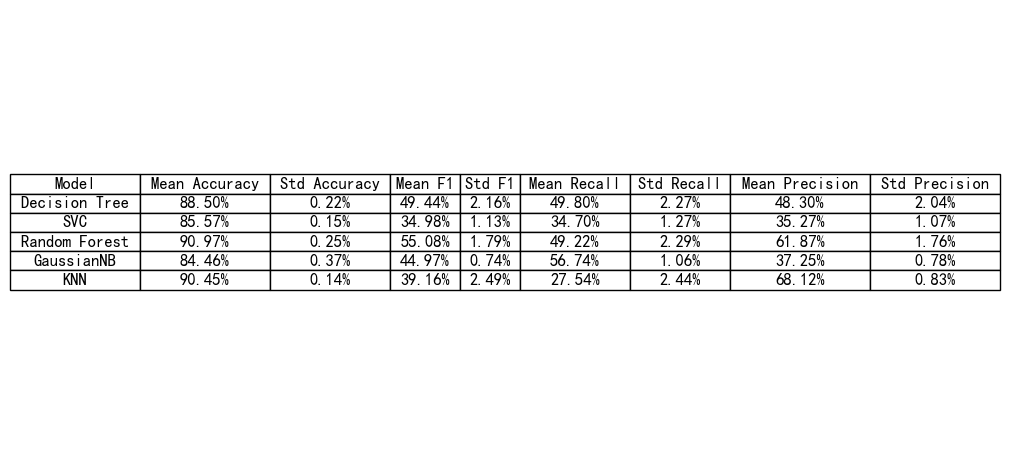

In [50]:
# 创建一个字典，包含模型的名称和对应的性能指标
performance_data = {
    'Model': ['Decision Tree', 'SVC', 'Random Forest', 'GaussianNB', 'KNN'],
    'Mean Accuracy': [cv_mean_accuracy, svc_cv_mean_accuracy, rfc_cv_mean_accuracy, nb_cv_mean_accuracy, knn_cv_mean_accuracy],
    'Std Accuracy': [cv_std_accuracy, svc_cv_std_accuracy, rfc_cv_std_accuracy, nb_cv_std_accuracy, knn_cv_std_accuracy],
    'Mean F1': [cv_mean_f1, svc_cv_mean_f1, rfc_cv_mean_f1, nb_cv_mean_f1, knn_cv_mean_f1],
    'Std F1': [cv_std_f1, svc_cv_std_f1, rfc_cv_std_f1, nb_cv_std_f1, knn_cv_std_f1],
    'Mean Recall': [cv_mean_recall, svc_cv_mean_recall, rfc_cv_mean_recall, nb_cv_mean_recall, knn_cv_mean_recall],
    'Std Recall': [cv_std_recall, svc_cv_std_recall, rfc_cv_std_recall, nb_cv_std_recall, knn_cv_std_recall],
    'Mean Precision': [cv_mean_precision, svc_cv_mean_precision, rfc_cv_mean_precision, nb_cv_mean_precision, knn_cv_mean_precision],
    'Std Precision': [cv_std_precision, svc_cv_std_precision, rfc_cv_std_precision, nb_cv_std_precision, knn_cv_std_precision]
}

# 将字典转换为DataFrame
performance_df = pd.DataFrame(performance_data)

# 将数值转换为百分比形式并保留四位小数
performance_df.iloc[:, 1:] = performance_df.iloc[:, 1:].applymap(lambda x: '{:.2%}'.format(x))

# 打印汇总表
print(performance_df)

# 绘制表格
fig, ax = plt.subplots(figsize=(12, 6))  # 设置图形大小
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=performance_df.values, colLabels=performance_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
table.auto_set_column_width(col=list(range(len(performance_df.columns))))

# 设置表格标题
plt.subplots_adjust(top=0.85)  
plt.show()

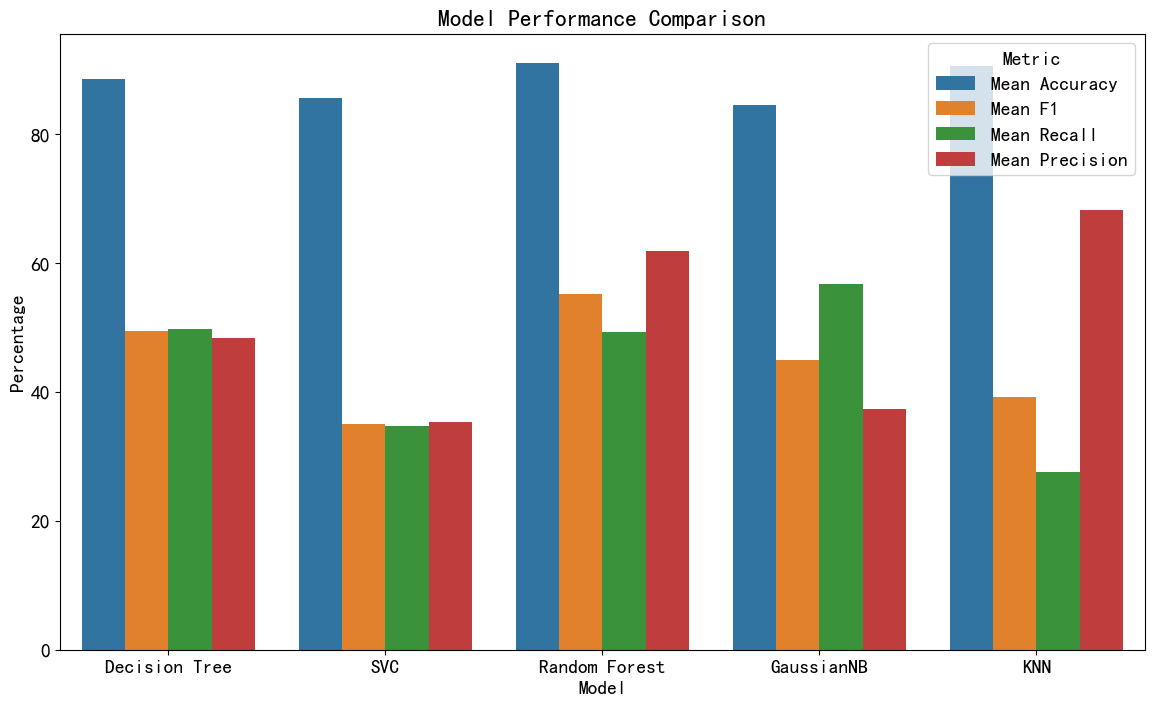

In [51]:
# 创建一个字典，包含模型的名称和对应的性能指标
performance_data = {
    'Model': ['Decision Tree', 'SVC', 'Random Forest', 'GaussianNB', 'KNN'],
    'Mean Accuracy': [cv_mean_accuracy, svc_cv_mean_accuracy, rfc_cv_mean_accuracy, nb_cv_mean_accuracy, knn_cv_mean_accuracy],
    'Mean F1': [cv_mean_f1, svc_cv_mean_f1, rfc_cv_mean_f1, nb_cv_mean_f1, knn_cv_mean_f1],
    'Mean Recall': [cv_mean_recall, svc_cv_mean_recall, rfc_cv_mean_recall, nb_cv_mean_recall, knn_cv_mean_recall],
    'Mean Precision': [cv_mean_precision, svc_cv_mean_precision, rfc_cv_mean_precision, nb_cv_mean_precision, knn_cv_mean_precision]
}

# 将字典转换为 DataFrame
performance_df = pd.DataFrame(performance_data)

# 将数值转换为百分比形式并保留两位小数
performance_df.iloc[:, 1:] = performance_df.iloc[:, 1:].applymap(lambda x: x * 100)

# 将 DataFrame 转换为长格式
performance_df_long = pd.melt(performance_df, id_vars=['Model'], var_name='Metric', value_name='Value')

# 设置图形大小
plt.figure(figsize=(14, 8))

# 绘制分组条形图
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_df_long)

# 添加标题和标签
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Percentage')

# 显示图形
plt.show()

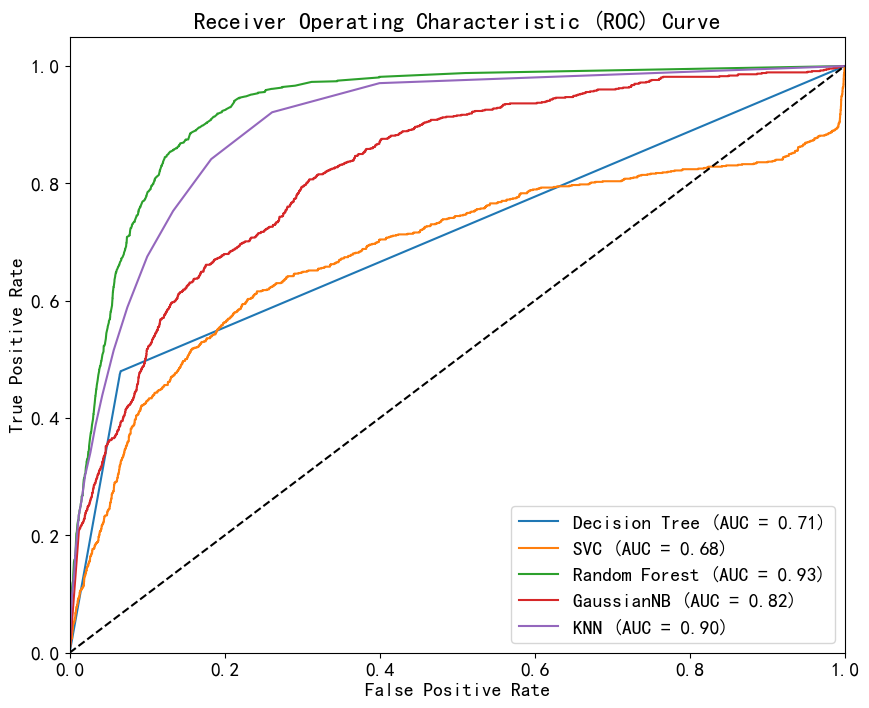

In [52]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# 初始化绘图
plt.figure(figsize=(10, 8))

# 决策树
dtree_prob = dtree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dtree_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))

# 支持向量机
svc_prob = svc.decision_function(X_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_prob)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = {:.2f})'.format(roc_auc_svc))

# 随机森林
rfc_prob = rfc.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_prob)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rfc))

# 朴素贝叶斯
nb_prob = gaussiannb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label='GaussianNB (AUC = {:.2f})'.format(roc_auc_nb))

# k近邻分类
knn_prob = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))

# 绘制对角线
plt.plot([0, 1], [0, 1], 'k--')

# 设置图形
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# 显示图形
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.208341 to fit



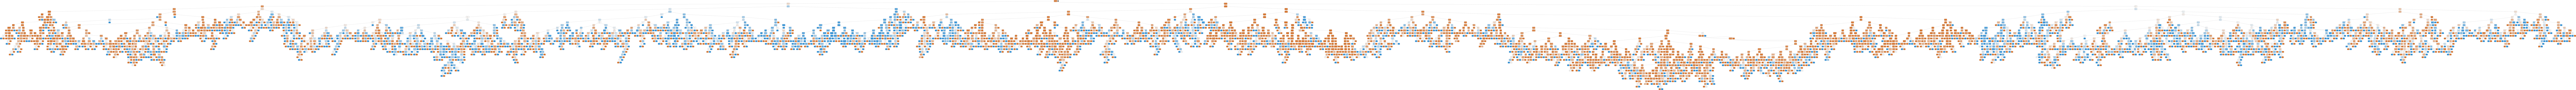

In [53]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# 导出决策树模型为DOT格式
dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=bank_final.columns,  
                           class_names=['No', 'Yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# 使用pydotplus将DOT格式转换为图像
graph = pydotplus.graph_from_dot_data(dot_data)  

# 显示图像
Image(graph.create_png())

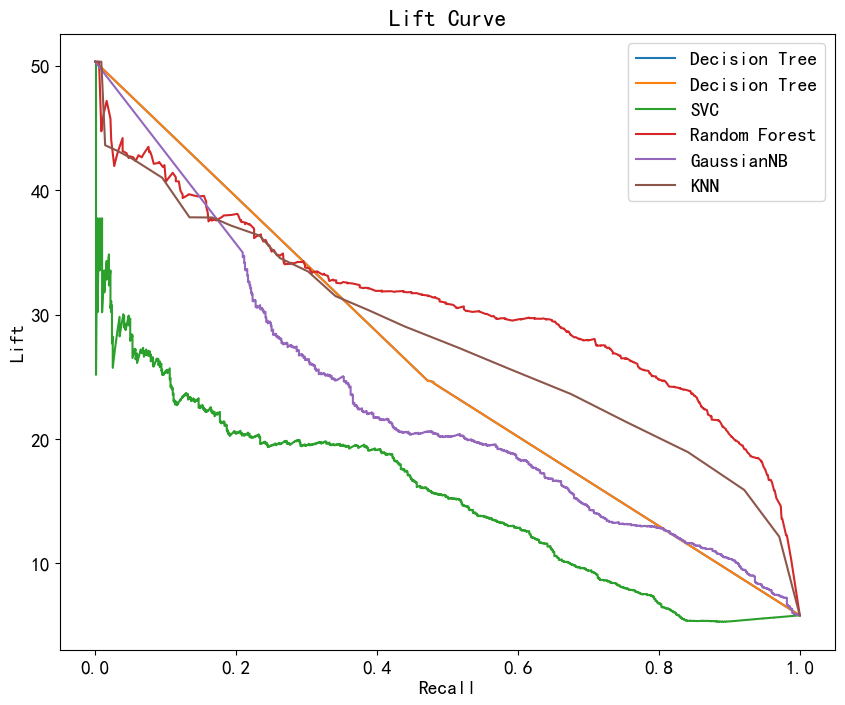

In [54]:
from sklearn.metrics import precision_recall_curve

# 计算决策树累积增益
precision, recall, thresholds = precision_recall_curve(y_test, dtree_prob)

# 计算LIFT曲线
lift = precision / (sum(y_test.values) / len(y_test))

# 绘制LIFT曲线
plt.figure(figsize=(10, 8))
plt.plot(recall, lift, label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend(loc='best')
# 计算支持向量机的累积增益
precision_svc, recall_svc, _ = precision_recall_curve(y_test, svc_prob)
lift_svc = precision_svc / (sum(y_test.values) / len(y_test))

# 计算随机森林的累积增益
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, rfc_prob)
lift_rfc = precision_rfc / (sum(y_test.values) / len(y_test))

# 计算朴素贝叶斯的累积增益
precision_nb, recall_nb, _ = precision_recall_curve(y_test, nb_prob)
lift_nb = precision_nb / (sum(y_test.values) / len(y_test))

# 计算k近邻的累积增益
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_prob)
lift_knn = precision_knn / (sum(y_test.values) / len(y_test))

# 绘制LIFT曲线
plt.plot(recall, lift, label='Decision Tree')
plt.plot(recall_svc, lift_svc, label='SVC')
plt.plot(recall_rfc, lift_rfc, label='Random Forest')
plt.plot(recall_nb, lift_nb, label='GaussianNB')
plt.plot(recall_knn, lift_knn, label='KNN')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend(loc='best')
plt.show()
